<a href="https://colab.research.google.com/github/olesya-eremina/introDSML/blob/main/tasks/decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [2]:
from sklearn.model_selection import cross_val_score

In [3]:
from sklearn.tree import plot_tree

In [4]:
from sklearn.metrics import accuracy_score

In [5]:
import numpy as np
%matplotlib inline

from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 50% !important; height: 60% !important;} </style>"

In [6]:
from sklearn.model_selection import GridSearchCV

In [7]:
from sklearn.metrics import precision_score, recall_score

#2.1

In [8]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})

In [9]:
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [10]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [11]:
x = data[['X_1', 'X_2']]
y = data.Y

In [12]:
clf.fit(x, y)

DecisionTreeClassifier(criterion='entropy')

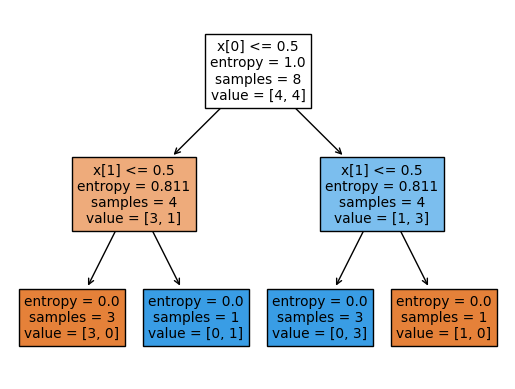

In [13]:
plot_tree(clf,filled=True);

#2.2

In [14]:
data2 = pd.read_csv("https://stepik.org/media/attachments/course/4852/cats.csv")

In [15]:
data2

,Unnamed: 0,Шерстист,Гавкает,Лазает по деревьям,Вид
0,0,1,1,0,собачка
1,1,1,1,0,собачка
2,2,1,1,0,собачка
3,3,1,1,0,собачка
4,4,1,0,1,котик
5,5,1,0,1,котик
6,6,1,0,1,котик
7,7,1,0,1,котик
8,8,1,1,1,котик
9,9,0,0,1,котик


In [16]:
clf2 = tree.DecisionTreeClassifier(criterion='entropy')

In [17]:
x = data2[['Шерстист', 'Гавкает', 'Лазает по деревьям']]
y = data2[['Вид']]

In [18]:
clf2.fit(x, y)

DecisionTreeClassifier(criterion='entropy')

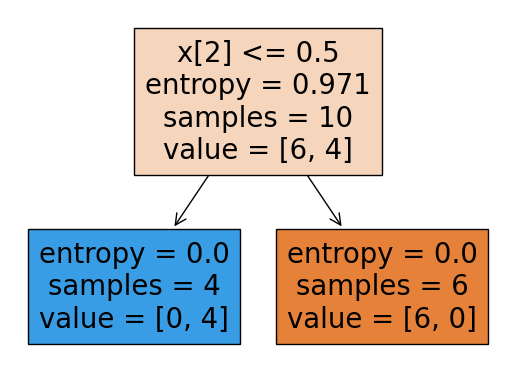

In [19]:
plot_tree(clf2,filled=True);

In [20]:
import math as m

In [21]:
E_sh_0=(1/1)*m.log2((1/1)) - 0
E_sh_1=-(4/9)*m.log2((4/9)) - (5/9)*m.log2((5/9))
E_gav_0=0 - (5/5)*m.log2((5/5))
E_gav_1=-(4/5)*m.log2((4/5)) - (1/5)*m.log2((1/5))
E_laz_1=0 - (6/6)*m.log2((6/6))
E_laz_0=-(4/4)*m.log2((4/4)) - 0

In [22]:
E_y=-(4/10)*m.log2((4/10)) - (6/10)*m.log2((6/10))

In [23]:
E_y

0.9709505944546686

In [24]:
ig_sh = (1/10)*E_sh_0 + (9/10)*E_sh_1
ig_gav = (5/10)*E_gav_0 + (5/10)*E_gav_1
ig_laz = (4/10)*E_laz_0 + (6/10)*E_laz_1

In [25]:
E_sh_1

0.9910760598382222

In [26]:
E_gav_1

0.7219280948873623

In [27]:
E_y - ig_sh

0.07898214060026854

In [28]:
E_y - ig_gav

0.6099865470109874

In [29]:
E_y - ig_laz

0.9709505944546686

#2.3 титаник начало

In [30]:
titanic_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')


In [31]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [33]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived

In [34]:
X = pd.get_dummies(X)

In [35]:
X = X.fillna({'Age': X.Age.median()})

In [36]:
X.isnull().sum()

,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0
Sex_female,0
Sex_male,0
Embarked_C,0
Embarked_Q,0
Embarked_S,0


In [37]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [38]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

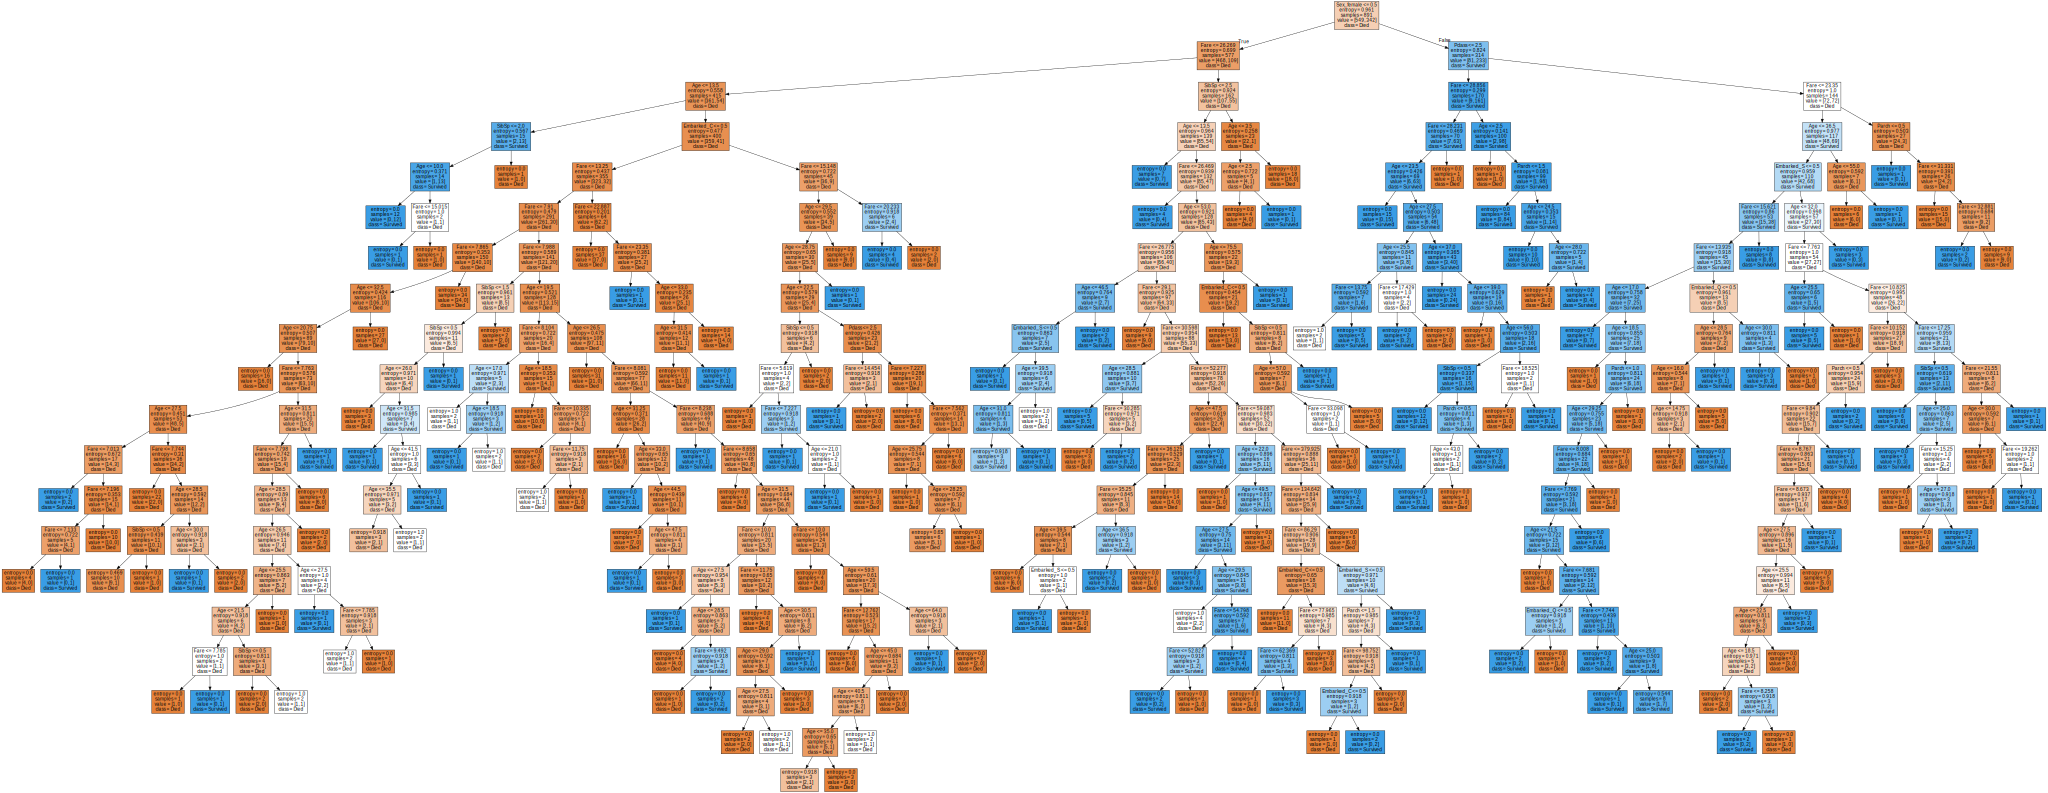

In [39]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X), class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [42]:
X_train.shape

(596, 10)

In [43]:
X_test.shape

(295, 10)

In [44]:
clf.score(X, y)

0.9797979797979798

In [45]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [46]:
clf.score(X_train, y_train)

0.9798657718120806

In [47]:
clf.score(X_test, y_test)

0.7830508474576271

In [48]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [49]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [50]:
clf.score(X_train, y_train)

0.8238255033557047

In [51]:
clf.score(X_test, y_test)

0.8203389830508474

#2.4; 2.6 титаник продолжение

In [52]:
max_depth_values = range(1, 100)

In [53]:
scores_data = pd.DataFrame()

In [54]:
for max_depth in max_depth_values:
  clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
  clf.fit(X_train, y_train)
  train_score = clf.score(X_train, y_train)
  test_score = clf.score(X_test, y_test)

  mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

  temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                  'train_score': [train_score],
                                  'test_score': [test_score],
                                  'cross_val_score': [mean_cross_val_score]})
  scores_data = pd.concat([scores_data, temp_score_data], ignore_index=True)

In [55]:
scores_data

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
1,2,0.805369,0.776271,0.770196
2,3,0.823826,0.820339,0.790322
3,4,0.833893,0.823729,0.788627
4,5,0.840604,0.806780,0.797031
...,...,...,...,...
94,95,0.979866,0.772881,0.765140
95,96,0.979866,0.776271,0.776919
96,97,0.979866,0.772881,0.771863
97,98,0.979866,0.766102,0.766835


In [56]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'], var_name='set_type', value_name='score')

In [57]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
292,95,cross_val_score,0.765140
293,96,cross_val_score,0.776919
294,97,cross_val_score,0.771863
295,98,cross_val_score,0.766835


<Axes: xlabel='max_depth', ylabel='score'>

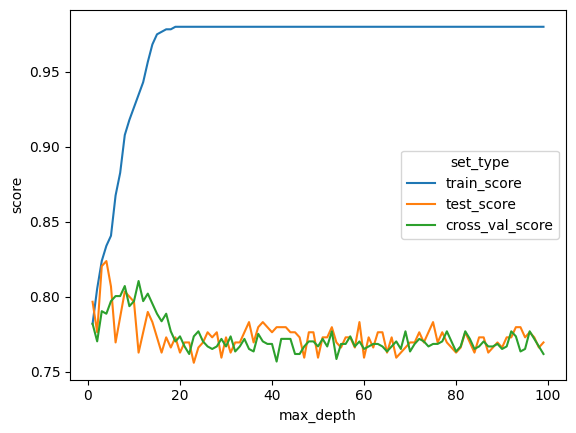

In [58]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

In [59]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.797031
203,6,cross_val_score,0.800392
204,7,cross_val_score,0.800378
205,8,cross_val_score,0.807087
206,9,cross_val_score,0.793641
207,10,cross_val_score,0.796989


In [60]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [61]:
best_clf.fit(X_train, y_train)
best_clf.score(X_test, y_test)

0.7966101694915254

In [62]:
clf = tree.DecisionTreeClassifier()

In [63]:
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

In [64]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)

In [65]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [66]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [67]:
best_clf = grid_search_cv_clf.best_estimator_

In [68]:
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [69]:
best_clf.score(X_test, y_test)

0.7966101694915254

In [70]:
y_pred = best_clf.predict(X_test)

In [71]:
precision_score(y_test, y_pred)

0.8125

In [72]:
recall_score(y_test, y_pred)

0.65

In [73]:
y_predicted_prob = best_clf.predict_proba(X_test)

In [74]:
y_predicted_prob

array([[0.8852459 , 0.1147541 ],
       [0.61538462, 0.38461538],
       [0.8852459 , 0.1147541 ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.25      , 0.75      ],
       [0.8852459 , 0.1147541 ],
       [0.25      , 0.75      ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.90196078, 0.09803922],
       [1.        , 0.        ],
       [0.8852459 , 0.1147541 ],
       [0.90196078, 0.09803922],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.69565217, 0.30434783],
       [0.8852459 , 0.1147541 ],
       [1.        , 0.        ],
       [0.8852459 , 0.1147541 ],
       [0.68      , 0.32      ],
       [0.69565217, 0.30434783],
       [0.8852459 , 0.1147541 ],
       [0.8852459 , 0.1147541 ],
       [1.        , 0.        ],
       [0.68      , 0.32      ],
       [0.61538462, 0.38461538],
       [1.        , 0.        ],
       [0.69565217, 0.30434783],
       [0.

In [75]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0])

<Axes: >

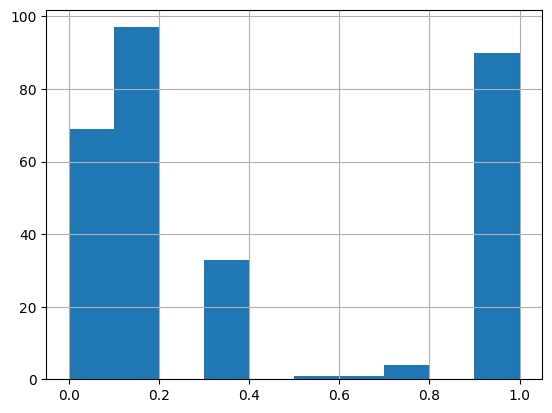

In [76]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [77]:
y_pred = np.where(y_predicted_prob[:,1] > 0.5, 1, 0)

In [78]:
precision_score(y_test, y_pred)

0.8125

In [79]:
recall_score(y_test, y_pred)

0.65

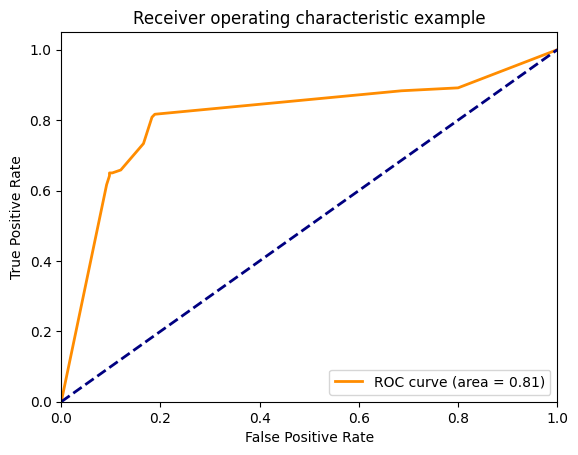

In [80]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#Ирисы задачка

In [81]:
iris_train = pd.read_csv("https://stepik.org/media/attachments/course/4852/train_iris.csv")

In [82]:
iris_test = pd.read_csv("https://stepik.org/media/attachments/course/4852/test_iris.csv")

In [83]:
iris_train.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2


In [84]:
iris_train = iris_train.drop(['Unnamed: 0'], axis=1)

In [85]:
iris_test = iris_test.drop(['Unnamed: 0'], axis=1)

In [86]:
iris_train.head()

,sepal length,sepal width,petal length,petal width,species
0,7.4,2.8,6.1,1.9,2
1,5.0,3.4,1.5,0.2,0
2,4.8,3.4,1.6,0.2,0
3,5.8,2.7,5.1,1.9,2
4,7.2,3.6,6.1,2.5,2


In [87]:
X_train = iris_train[['sepal length', 'sepal width', 'petal length', 'petal width']]
y_train = iris_train[['species']]

In [88]:
X_test = iris_test[['sepal length', 'sepal width', 'petal length', 'petal width']]
y_test = iris_test[['species']]

In [89]:
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()
np.random.seed(0)

for max_depth in max_depth_values:
  clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
  clf.fit(X_train, y_train)
  train_score = clf.score(X_train, y_train)
  test_score = clf.score(X_test, y_test)
  test_accuracy_score = accuracy_score(y_test, clf.predict(X_test))

  #mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

  temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                  'train_score': [train_score],
                                  'test_score': [test_score],
                                  'test_accuracy_score': [test_accuracy_score]})
                                  #'cross_val_score': [mean_cross_val_score]})
  scores_data = pd.concat([scores_data, temp_score_data], ignore_index=True)

In [90]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'test_accuracy_score'], var_name='set_type', value_name='score')

<Axes: xlabel='max_depth', ylabel='score'>

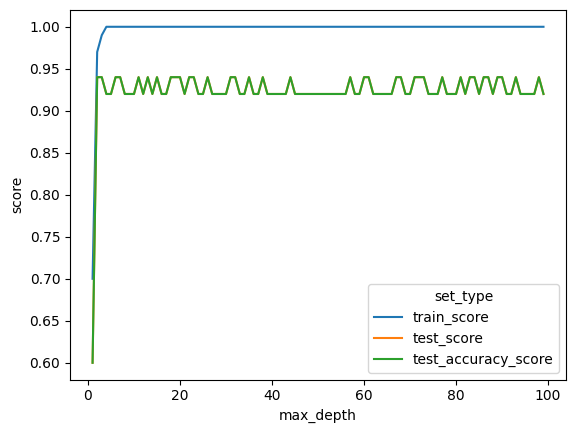

In [91]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

#Котики и собачки задачка

In [92]:
cats_train = pd.read_csv("https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv")

In [93]:
cats_train.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [94]:
cats_train.isnull().sum()

,0
Длина,0
Высота,0
Шерстист,0
Гавкает,0
Лазает по деревьям,0
Вид,0


In [95]:
X = cats_train[['Длина', 'Высота', 'Шерстист', 'Гавкает', 'Лазает по деревьям']]
y = cats_train[['Вид']]

In [96]:
y = pd.get_dummies(y).drop('Вид_котик', axis=1)

In [97]:
y.head()

,Вид_собачка
0,True
1,True
2,True
3,True
4,True


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [99]:
X_train.shape

(670, 5)

In [100]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [101]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

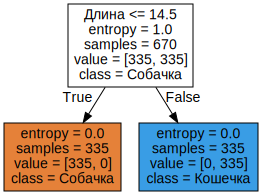

In [102]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X_train), class_names=['Собачка', 'Кошечка'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [103]:
clf.score(X_train, y_train)

1.0

In [104]:
clf.score(X_test, y_test)

1.0

#2.7 практика

In [106]:
data = pd.read_csv("https://stepik.org/media/attachments/course/4852/train_data_tree.csv")

In [107]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [109]:
data.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [112]:
X = data[['sex', 'exang']]
y = data[['num']]

,num
0,1
1,1
2,1
3,0
4,1
...,...
233,0
234,0
235,1
236,1


In [115]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

[Text(0.5, 0.8333333333333334, 'x[1] <= 0.5\nentropy = 0.996\nsamples = 238\nvalue = [128, 110]'),
 Text(0.25, 0.5, 'x[0] <= 0.5\nentropy = 0.903\nsamples = 157\nvalue = [107, 50]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.612\nsamples = 53\nvalue = [45, 8]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.973\nsamples = 104\nvalue = [62, 42]'),
 Text(0.75, 0.5, 'x[0] <= 0.5\nentropy = 0.826\nsamples = 81\nvalue = [21, 60]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.954\nsamples = 16\nvalue = [6, 10]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.779\nsamples = 65\nvalue = [15, 50]')]

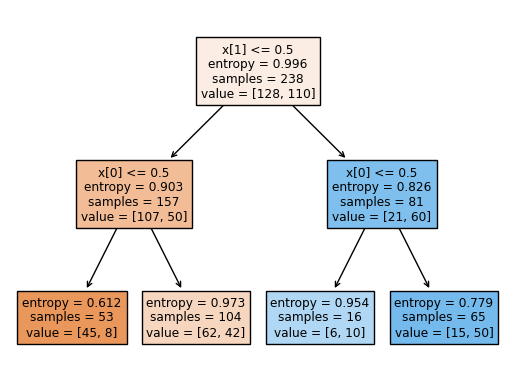

In [116]:
tree.plot_tree(clf, filled=True)

In [124]:
0.996-(157/238)*0.903-(81/238)*0.826

0.11920588235294122

In [126]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size=0.75)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

In [138]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import RandomizedSearchCV


iris = load_iris()
X = iris.data
y = iris.target
clf = DecisionTreeClassifier()

parametrs = {'max_depth': range(1,11), 'min_samples_split': range(2,11), 'min_samples_leaf': range(1,11)}
search = RandomizedSearchCV(clf, parametrs)

search.fit(X, y)
best_tree = search.best_estimator_

In [139]:
best_tree

DecisionTreeClassifier(max_depth=9, min_samples_split=9)

In [137]:
from sklearn.model_selection import RandomizedSearchCV

iris = load_iris()
X = iris.data
y = iris.target

depth_brute = range(1, 10)
split_brute = range(2, 10)
leaf_brute  = range(1, 10)

dt = DecisionTreeClassifier()

params_to_brute = {
    "max_depth"         :   depth_brute,
    "min_samples_split" :   split_brute,
    "min_samples_leaf"  :   leaf_brute,
}

search = RandomizedSearchCV(dt, params_to_brute)

search.fit(X, y)

best_tree = search.best_estimator_

In [132]:

best_tree

DecisionTreeClassifier(max_depth=3)